# Quantum Computing Part 2

In [1]:
pip install qibo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 

In [1]:
import qibo
import logging

logger = logging.getLogger("qibo")
logger.setLevel(logging.CRITICAL)

Now that you are familiar with qubits, gates and measurements, we will move on to map quantum computing to a physical experiment: the Mach-Zender Interferometer. This experiment is instrumental in demonstrating fundamental principles of quantum mechanics.


In this lesson, you will learn
- Basic optical interferometry
- How to set up a Mach-Zender Interferometer using Qibo

# Gate Reference
These are the available gates that we have covered in the previous lesson.

```python
gates.X(0)
```

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

```python
gates.Y(0)
```

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$

```python
gates.Z(0)
```

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$


```python
gates.H(0)
```
$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

```python
gates.M(0)
```
The measure gate that "collapses" the qubit to either $|0⟩$ state and the $|1⟩$ state.

# Optical Qubits/Photons

Before we jump into using Qibo and solving the problem, let's study the physical picture.

We have travelling photons generated from a laser and a photodetector that counts the number of photons arrives at it.

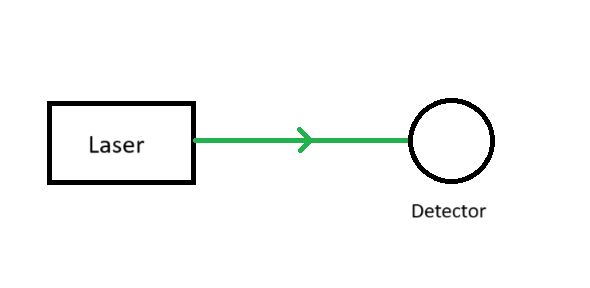


The detector detects the path of the qubit. In this case, it is the $→$ path.

There are also optical elements., such as mirrors.

When we place these mirrors in 45$°$ orientations, the path of the laser beam changes from $↑$ to $↓$

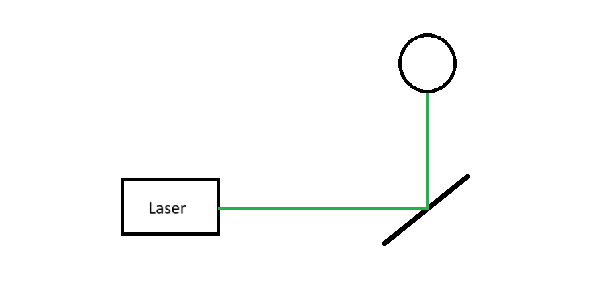

The → and $↑$ paths of the photons are orthogonal. Hence, we can map these paths into qubit states.

$|→⟩ = |0⟩ = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|↑⟩ = |1⟩ = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

# Exercise 1
Design a quantum circuit that emulates the above optical setup

In [2]:
from qibo import gates, Circuit

circ = Circuit(1)
xgate = gates.X(0)
ygate = gates.Y(0)
zgate = gates.Z(0)
hadamard_gate = gates.H(0)
measure_gate = gates.M(0)

circ.add(xgate)
circ.add(measure_gate)

results = circ(nshots=100)
print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))

[Qibo 0.2.8|INFO|2024-06-20 13:58:43]: Using tensorflow backend on /device:CPU:0
INFO:qibo.config:Using tensorflow backend on /device:CPU:0


P(|0>): tf.Tensor(0.0, shape=(), dtype=float64)
P(|1>): tf.Tensor(1.0, shape=(), dtype=float64)


Another optical element is the beamsplitter.

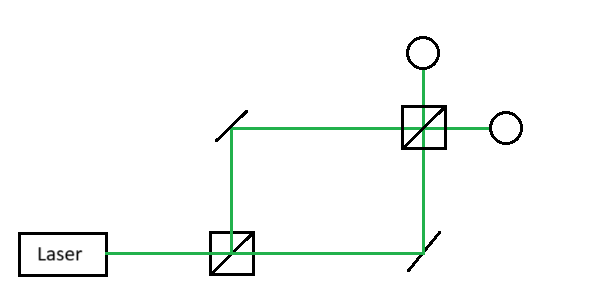

This setup is known as a simplified Mach-Zender interferometer and it measures if the phase shift between the 2 initially split beams.

# Exercise 3

Predict the measurement probability at each state.

In [3]:
from qibo import gates, Circuit

circ = Circuit(1)
xgate = gates.X(0)
ygate = gates.Y(0)
zgate = gates.Z(0)
hadamard_gate = gates.H(0)
measure_gate = gates.M(0)

circ.add(hadamard_gate)     # first beam splitter
circ.add(xgate)             # mirror flip
circ.add(hadamard_gate)     # second beam splitter
circ.add(measure_gate)

results = circ(nshots=100)
print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))

P(|0>): tf.Tensor(1.0, shape=(), dtype=float64)
P(|1>): tf.Tensor(0.0, shape=(), dtype=float64)


The first beam splitter creates a superposition of the $|→⟩$ and the $|↑⟩$ states.

$H|→⟩ = \frac{1}{\sqrt{2}}(|→⟩ + |↑⟩)$

Next, the mirror flips the $|→⟩$ and the $|↑⟩$ states, but since they have the same probability amplitude, there is no effect.

$X\frac{1}{\sqrt{2}}(|→⟩ + |↑⟩) = \frac{1}{\sqrt{2}}(|→⟩ + |↑⟩)$

Finally, the second beam-splitter acts on the superposition state.

$H\frac{1}{\sqrt{2}}(|→⟩ + |↑⟩) = |→⟩$

Because the path lengths are equal, there is naturally no phase shift between the two beams and they recombine to give us the initial state.

What happens if there is a path difference in the two paths?

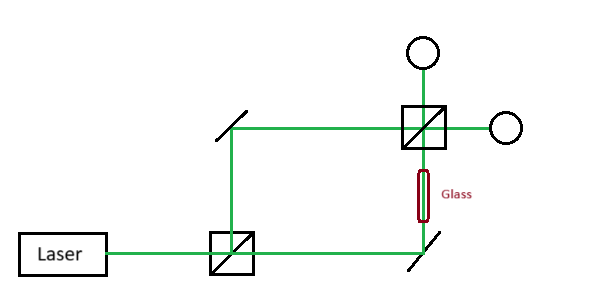

Here, we have placed a piece of glass. The speed of lght in the glass is reduced, which causes the path length of the two beams to differ. For convenience's sake, we say that this imparts a phase shift of $-1$ on the $|↑⟩$ state.

# Exercise 4

Create a quantum circuit that emulates the above optical experiment and check if the results agree with your expectations

In [5]:
from qibo import gates, Circuit

circ = Circuit(1)
xgate = gates.X(0)
ygate = gates.Y(0)
zgate = gates.Z(0)
hadamard_gate = gates.H(0)
measure_gate = gates.M(0)

circ.add(hadamard_gate)
circ.add(xgate)
circ.add(zgate)
#### instead of x then z, we can do y gate, since cross product of x and z gives y
circ.add(hadamard_gate)
circ.add(measure_gate)

results = circ(nshots=100)
print("P(|0>):", round(results.probabilities()[0], 3))
print("P(|1>):", round(results.probabilities()[1], 3))

P(|0>): tf.Tensor(0.0, shape=(), dtype=float64)
P(|1>): tf.Tensor(1.0, shape=(), dtype=float64)


# Conclusion
In this lesson, you have used single qubit gates in a quantum circuit to emulate an interferometer.
- Qubit state - Path of the beam
- X gate - Mirror
- E gate - Beam splitter
- M gate - Detectors
- ? gate - Glass

You have applied the $H$ gates to create superposition of states and to also measure in the superposition basis. Here, we have only used the superposition property of quantum mechanics for single qubit quantum computing.